## 1.Basic EDA

In [130]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r"C:\Users\Admin\Downloads\Cleaned_Build_week_project1.csv") # Using the same filepath

# Display basic information about the dataset
print("\n*** Basic Information ***")
df.info()

# Display the first few rows
print("\n*** First 5 Rows ***")
print(df.head())

# Get summary statistics
print("\n*** Summary Statistics ***")
print(df.describe())

# Check for missing values
print("\n*** Missing Values ***")
print(df.isnull().sum())

# Check for duplicate records
print("\n*** Duplicate Values ***")
print(df.duplicated().sum())

# Compute Q1, Q2 and Q3 for outlier treatment
Q1 = df['Price'].quantile(0.25)
Q2 = df['Price'].quantile(0.50)
Q3 = df['Price'].quantile(0.75)
# Interquartile Range
IQR = Q3-Q1
# Lower bound and Upper bound.
LW = Q1-1.5*IQR
UW = Q3+1.5*IQR
# Identify Outliers
outliers = df[(df["Price"] < LW) | (df["Price"] > UW)]
# Calculate Outlier Percentage
outlier_percentage = (len(outliers) / len(df)) * 100
print(f"\nTotal Outliers: {len(outliers)}")
print(f"Outlier Percentage: {outlier_percentage:.2f}%")


*** Basic Information ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1000 non-null   object 
 1   Price         1000 non-null   float64
 2   Availability  1000 non-null   object 
 3   Rating        1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB

*** First 5 Rows ***
                                  Title  Price Availability  Rating
0                  A Light in the Attic  51.77     In stock       3
1                    Tipping the Velvet  53.74     In stock       1
2                            Soumission  50.10     In stock       1
3                         Sharp Objects  47.82     In stock       4
4  Sapiens A Brief History of Humankind  54.23     In stock       5

*** Summary Statistics ***
            Price       Rating
count  1000.00000  1000.000000
mean     35.07035     2.923

## 2. Data Visualization

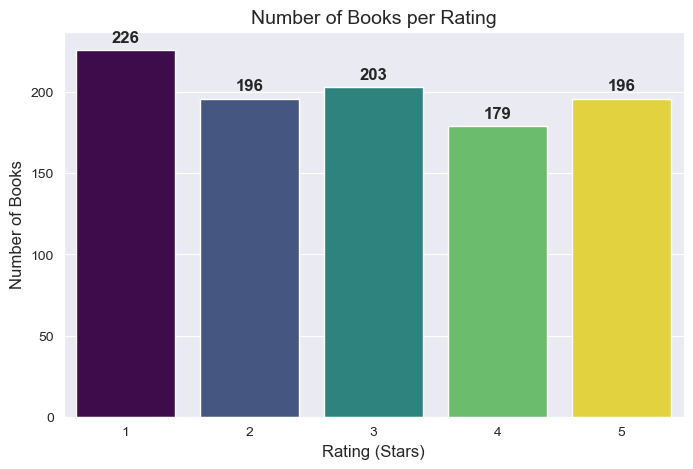

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better aesthetics
sns.set_style("darkgrid")

# Count the number of books for each rating
all_ratings = range(1, 6)  # Ensure all ratings (1-5) appear
rating_counts = df["Rating"].value_counts().reindex(all_ratings, fill_value=0)

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette="viridis", legend=False)

# Add value labels on top of bars
for i, count in enumerate(rating_counts.values):
    plt.text(i, count + 5, str(count), ha="center", fontsize=12, fontweight="bold")

plt.xlabel("Rating (Stars)", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)
plt.title("Number of Books per Rating", fontsize=14)
plt.show()


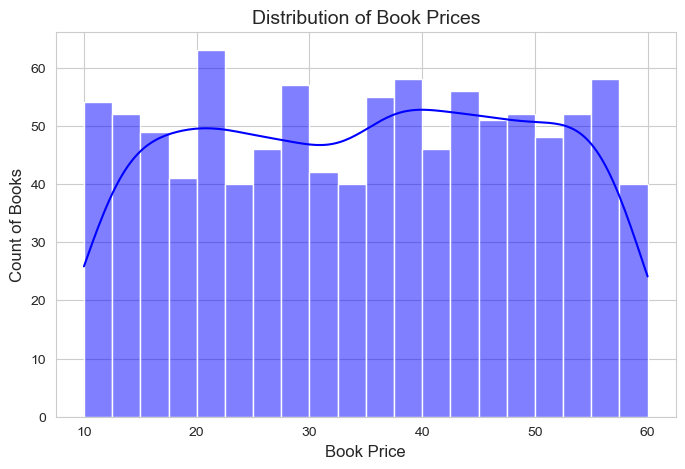

In [133]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=20, kde = True, color="blue")

plt.xlabel("Book Price", fontsize=12)
plt.ylabel("Count of Books", fontsize=12)
plt.title("Distribution of Book Prices", fontsize=14)

plt.show()


### Insights:
#### 1. The histogram shows that a large number of books fall between `$`20 and `$`50, indicating that this is the most common price range.
#### 2. The absence of long tails suggests that there are no extreme outliers in book prices, meaning most books fall within a reasonable range.

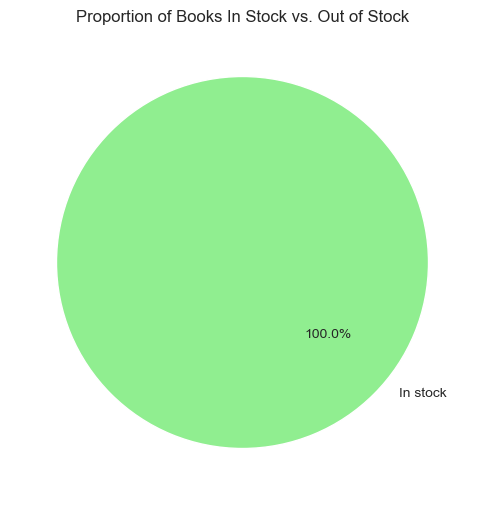

In [135]:
# Count the number of books in stock vs. out of stock
stock_counts = df["Availability"].value_counts()

plt.figure(figsize=(6, 10))
plt.pie(stock_counts, labels=stock_counts.index, autopct='%1.1f%%', 
        colors=["lightgreen", "lightcoral"], startangle=140)

plt.title("Proportion of Books In Stock vs. Out of Stock")

plt.show()


### Insights:
#### All books are In stock.

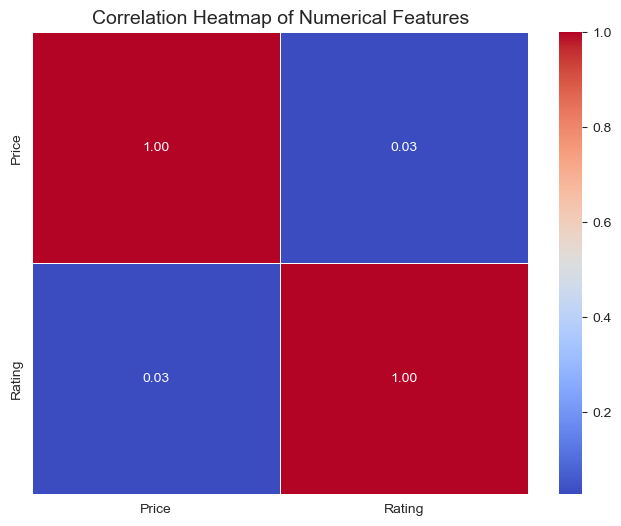

In [137]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)

plt.show()


### Insights:
#### The correlation between Price and Rating is 0.03, which is very close to 0. This suggests that higher-rated books are not necessarily more expensive.